# importation

In [1]:
from utilitaires import *
import pandas as pd
import numpy as np
import os
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data_path = "datasets"
# Result_train
print("chargement de result_train ...")
result_train = pd.read_csv( os.path.join(data_path,"results_train.csv") , sep = ',',encoding='utf-8')
res_train_df = result_train.copy()
#  Communes de France
print("chargement de commune france ...")
communes_france = pd.read_csv(os.path.join(data_path, "communes-france-2022.csv"), sep=',', encoding='utf-8')
communes_df = communes_france.copy()
print("chargement terminé.")

chargement de result_train ...
chargement de commune france ...
chargement terminé.


# colonnes à faible information

In [ ]:
best_combi_list = tune_thresholds(communes_df,mis_range=[0.5],bins_range=[5,10])
best_combo = best_combi_list[0]
col_to_drop = best_combo.to_drop
sep()
print("Meilleure combinaison trouvée:", best_combo)
print("\ncolonnes à supprimer:",col_to_drop)

progression: 100%|██████████| 54/54 [00:42<00:00,  1.27it/s]

score:60.9 | var:0.001 | ent:0.2 | mis:0.5 | n_bins:5 | strategy:uniform => 11 colonnes
score:60.0 | var:0.01 | ent:0.2 | mis:0.5 | n_bins:5 | strategy:uniform => 11 colonnes
score:56.0 | var:0.05 | ent:0.2 | mis:0.5 | n_bins:5 | strategy:uniform => 11 colonnes

------------------------------------------------------------------------------------------

Meilleure combinaison trouvée: combi(var_thresh=0.001, ent_thresh=0.2, mis_thresh=0.5, n_bins=5, strategy='uniform', nbcol=11, to_drop=['altitude_minimale', 'superficie_km2', 'longitude_centre', 'typecom_texte', 'densite', 'latitude_mairie', 'typecom', 'population', 'latitude_centre', 'longitude_mairie', 'superficie_hectare'], score=60.9)

colonnes à supprimer: ['altitude_minimale', 'superficie_km2', 'longitude_centre', 'typecom_texte', 'densite', 'latitude_mairie', 'typecom', 'population', 'latitude_centre', 'longitude_mairie', 'superficie_hectare']


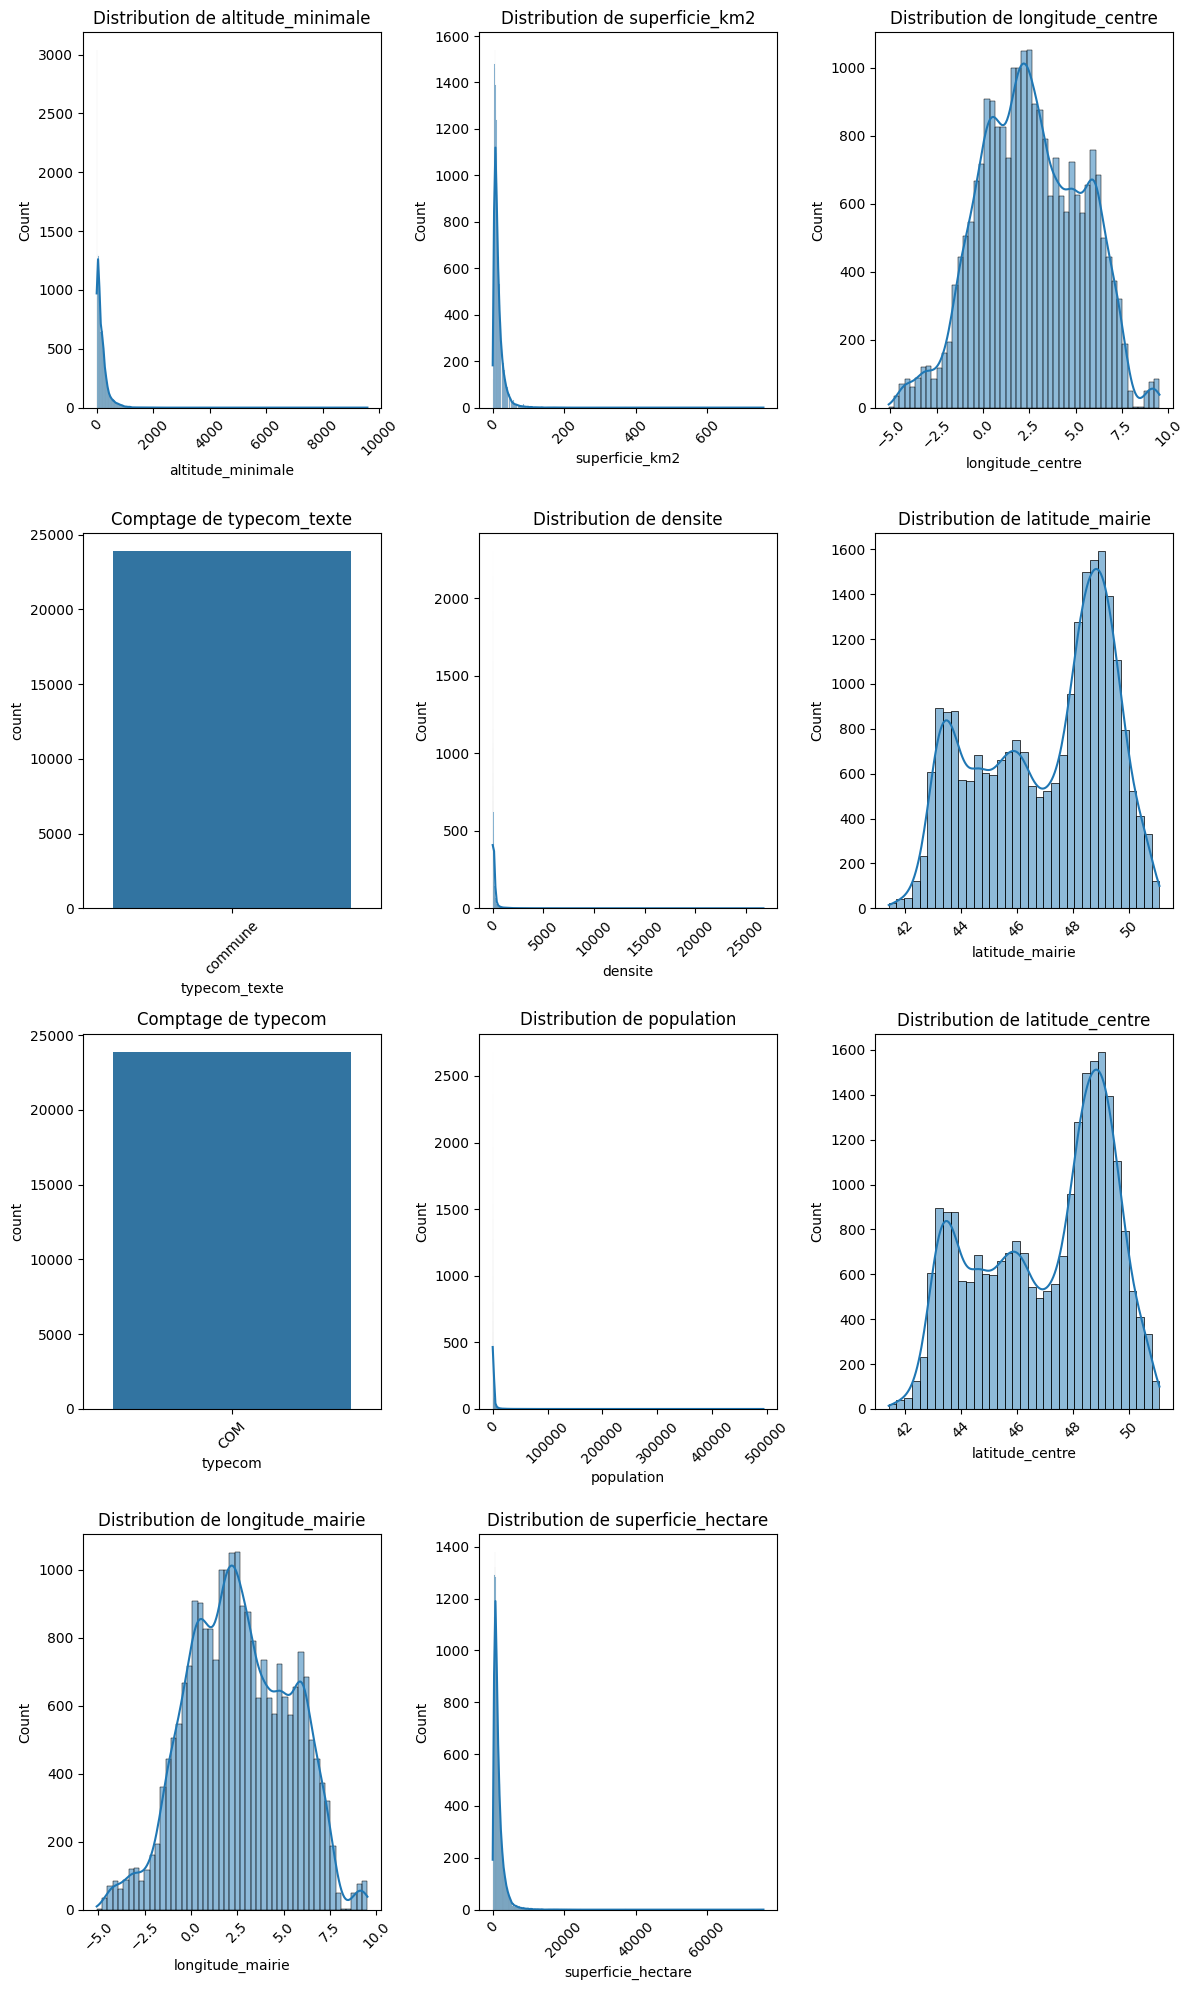

In [4]:
visualize_columns(communes_df,col_to_drop)

In [5]:
id_train = 'CodeINSEE'
id_commune = 'code_insee'

communes_df[id_commune] = communes_df[id_commune].astype(str).str.zfill(5)
res_train_df[id_train] = res_train_df[id_train].astype(str).str.zfill(5)

target = '% Voix/Ins'

mdb_merge_train = res_train_df.copy()[[id_train,target]].merge(communes_df.copy().drop(columns = col_to_drop),left_on=id_train,right_on=id_commune,how='left').drop(columns=[id_commune,id_train])

In [6]:
mdb_matrix =mutual_info_matrix(mdb_merge_train,target=target)

In [7]:
print(mdb_matrix.shape)

(28, 28)


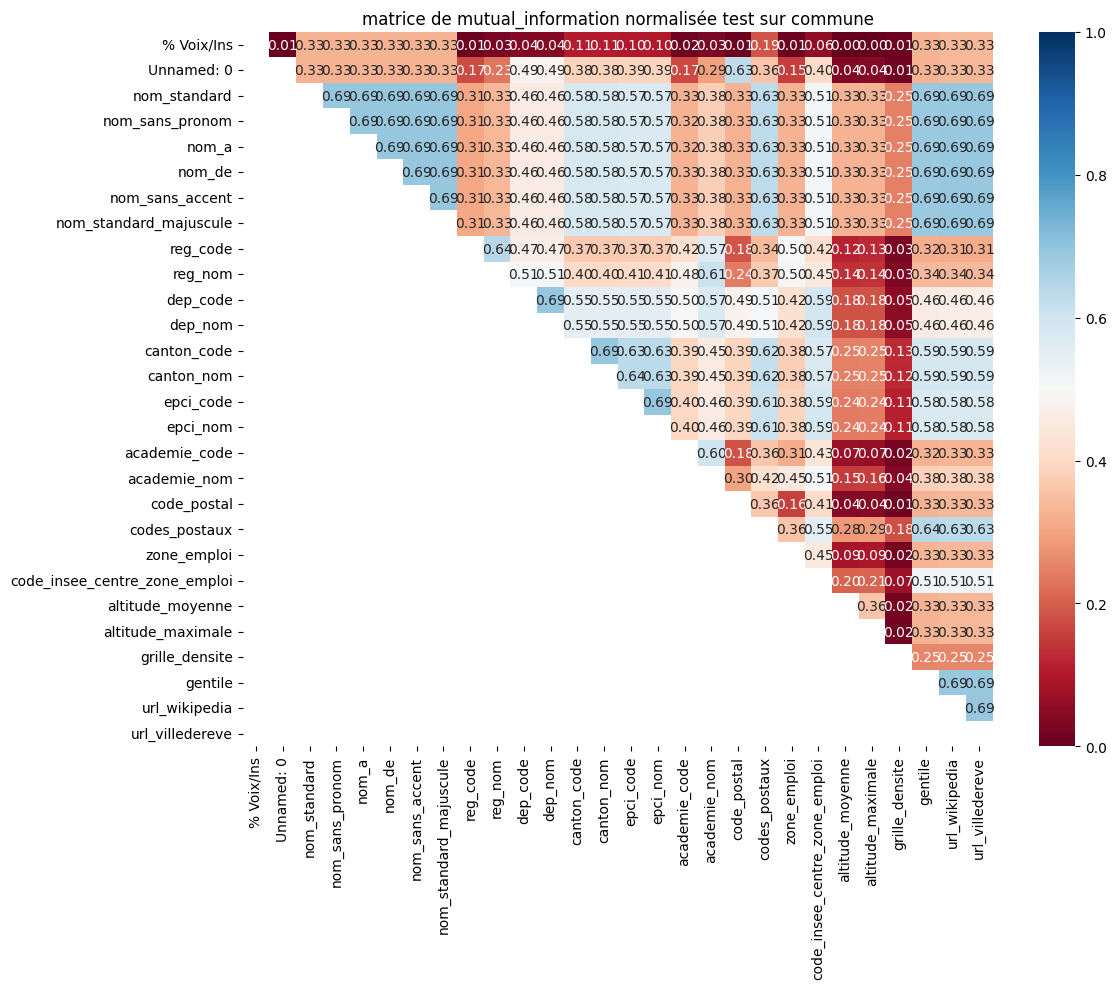

In [8]:
display_mutual_info_matrix(matrix=mdb_matrix , name='test sur commune')

In [ ]:
paires = get_dependant_pairs(matrix=mdb_matrix,threshold=0.68)
display_pairs(paires[20:55])


 35 Paires de colonnes dépendantes:
nom_de                | url_wikipedia        : nmi = 0.691 
nom_standard          | url_villedereve      : nmi = 0.691 
nom_standard_majuscule | url_villedereve      : nmi = 0.691 
nom_standard          | url_wikipedia        : nmi = 0.691 
nom_standard_majuscule | url_wikipedia        : nmi = 0.691 
nom_sans_accent       | url_villedereve      : nmi = 0.691 
nom_sans_accent       | url_wikipedia        : nmi = 0.691 
nom_a                 | url_villedereve      : nmi = 0.691 
nom_a                 | url_wikipedia        : nmi = 0.691 
nom_sans_pronom       | url_wikipedia        : nmi = 0.691 
nom_sans_pronom       | url_villedereve      : nmi = 0.691 
gentile               | url_wikipedia        : nmi = 0.688 
gentile               | url_villedereve      : nmi = 0.688 
nom_de                | gentile              : nmi = 0.687 
nom_standard          | gentile              : nmi = 0.687 
nom_standard_majuscule | gentile              : nmi = 0.687 


In [10]:
col_to_keep ,must_to_drop = remove_redundant_cols(matrix=mdb_matrix,target=target,threshold=0.6,verbose=True)
col_to_drop.extend(must_to_drop)
print(f"\n{len(col_to_drop)} Colonnes à supprimer après élimination des redondances:", col_to_drop)
print(f"\n{len(col_to_keep)} Colonnes à garder:", col_to_keep)


(dep_code             |        dep_nom        ) : ---x dep_nom
(url_wikipedia        |    url_villedereve    ) : ---x url_villedereve
(nom_standard         | nom_standard_majuscule) : ---x nom_standard_majuscule
(nom_standard         | nom_de              ) ---x nom_standard
(nom_de               | nom_standard_majuscule) : ---x nom_standard_majuscule
(nom_standard         |    nom_sans_accent    ) : ---x nom_sans_accent
(nom_sans_accent      | nom_standard_majuscule) ---x nom_sans_accent
(nom_de               |    nom_sans_accent    ) : ---x nom_sans_accent
(nom_standard         |         nom_a         ) : ---x nom_a
(nom_a                | nom_standard_majuscule) ---x nom_a
(nom_a                | nom_de              ) ---x nom_a
(nom_sans_pronom      | nom_a               ) ---x nom_sans_pronom
(nom_a                | nom_sans_accent     ) ---x nom_a
(canton_code          |       canton_nom      ) : ---x canton_nom
(epci_code            |        epci_nom       ) : ---x epci_nom
(nom

In [11]:
print(mdb_matrix[col_to_keep].shape)

(28, 11)


In [12]:
print(mdb_matrix.loc[col_to_keep,col_to_keep].shape)

(11, 11)


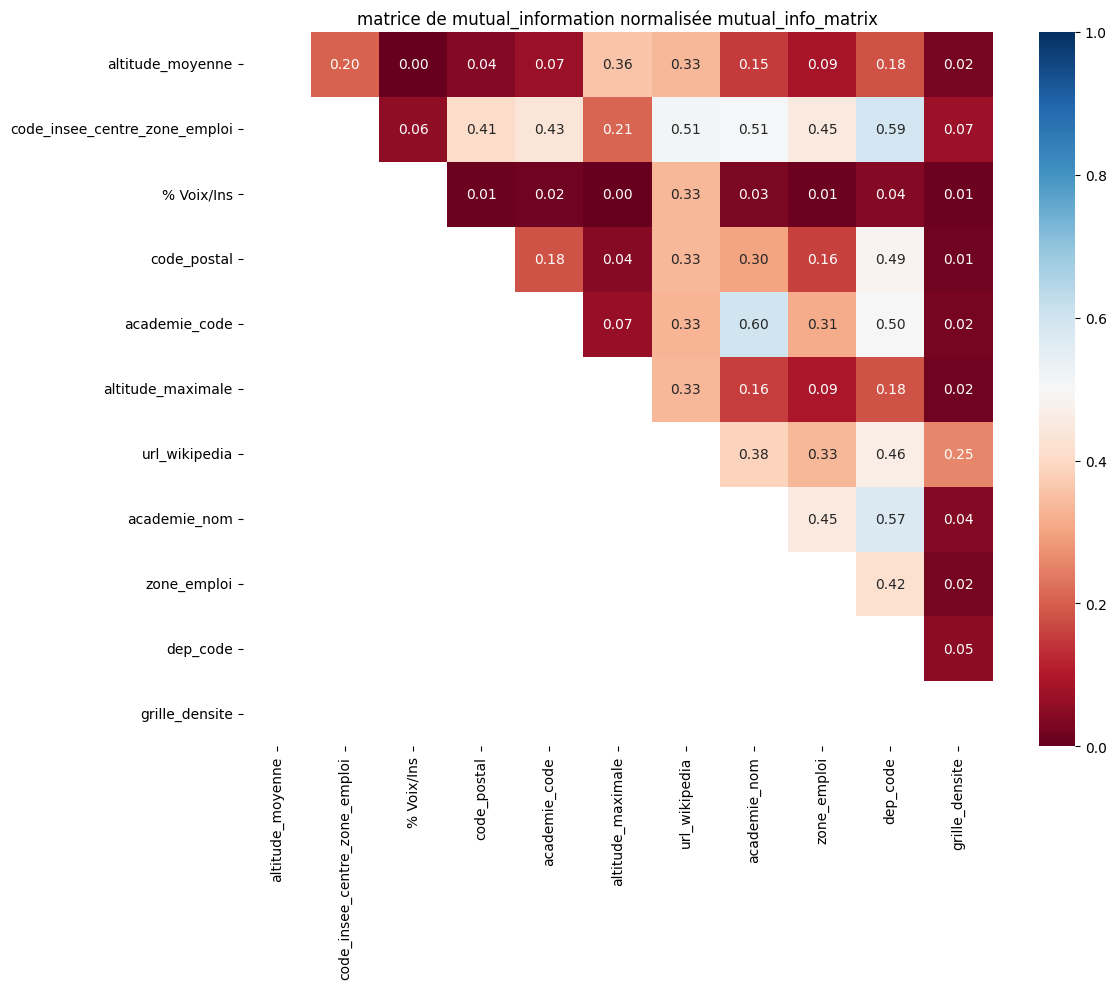

In [13]:
display_mutual_info_matrix(matrix=mdb_matrix.loc[col_to_keep,col_to_keep])

In [ ]:
visualize_columns(mdb_merge_train, col_to_drop)